# Классификация - и снова в бой!


Сегодня мы поговорим о том, чему же мы научились за последние практики?

Мы освоили основные методы работы как с данными, на основе которых можно решить задачу классификации, так и с моделями, которые это делают! Щикарррно!

Сегодняшняя задачка как всегда несложная, но очень важная - нам предстоит предсказывать болезни сердца!

В вашем распоряжении датасет [Heart Disease UCI](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci). Ваша задача предсказать, есть ли у человека заболевание сердца или нет.

Как всегда, ждем от вас полноценного анализа исходных данных, необходимой предобработки, feature engineering и поиск лучшего варианта, который даст наибольшую метрику!

* Задача под звездочкой. Попробуйте реализовать такую систему, которая реже пропускает больных пациентов - мы ведь не хотим больным людям говорить, что они здоровы, хотя это не так?

Мы желаем вам удачи - постарайтесь применить все накопленные знания и, может, чуть больше! Успехов!

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, RocCurveDisplay, precision_recall_curve, auc, recall_score
from sklearn.linear_model import Lasso
TEXT_COLOR = "black"

plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["text.color"] = TEXT_COLOR
plt.rcParams["font.size"] = 14
plt.rcParams["lines.markersize"] = 15
plt.rcParams["axes.labelcolor"] = TEXT_COLOR
plt.rcParams["xtick.color"] = TEXT_COLOR
plt.rcParams["ytick.color"] = TEXT_COLOR

sns.set_style("darkgrid")

# Зафиксируем состояние случайных чисел
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

In [2]:
df = pd.read_csv("heart_cleveland_upload.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [4]:
#посмотрим краткую инфу по столбцам датасета
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [5]:
#Посмотрим на категории целевой колонки:
df["condition"].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

In [6]:
#смотрим на общие пропуски в данных
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

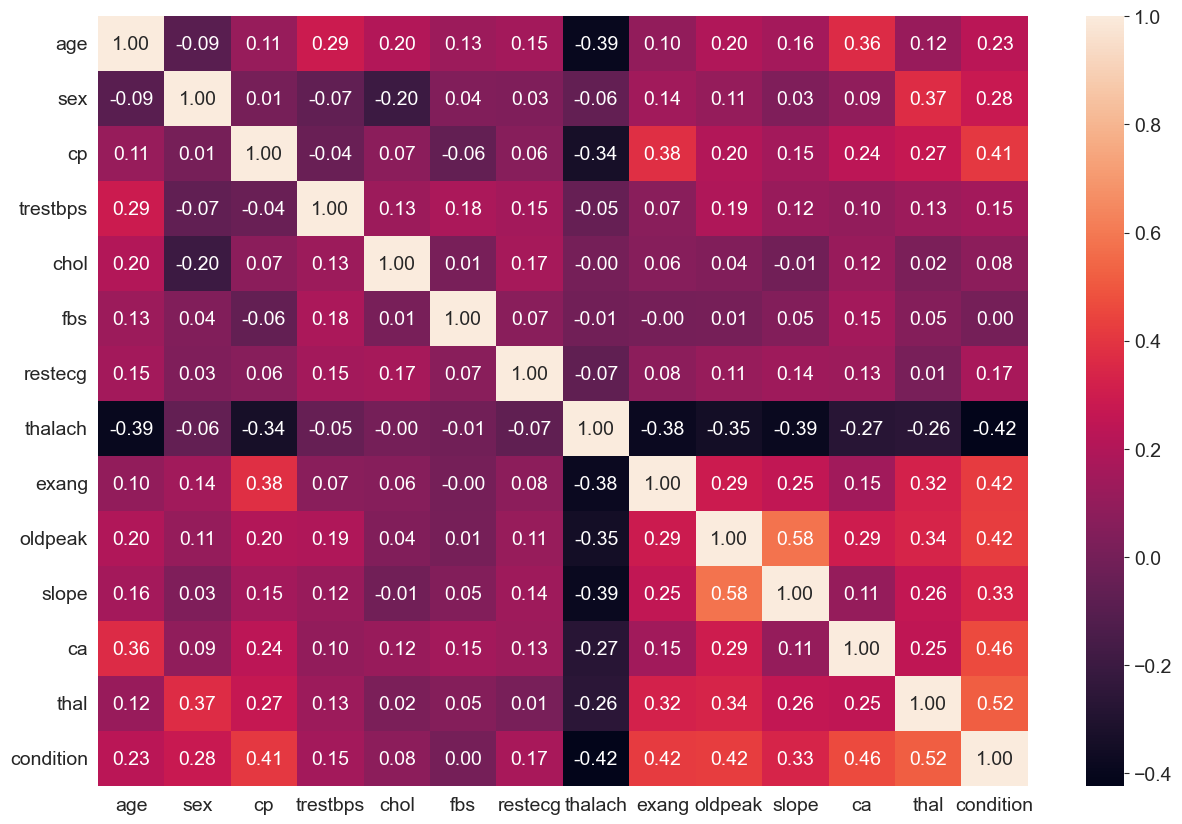

In [7]:
#посмотрим на тепловую карту корреляций 
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

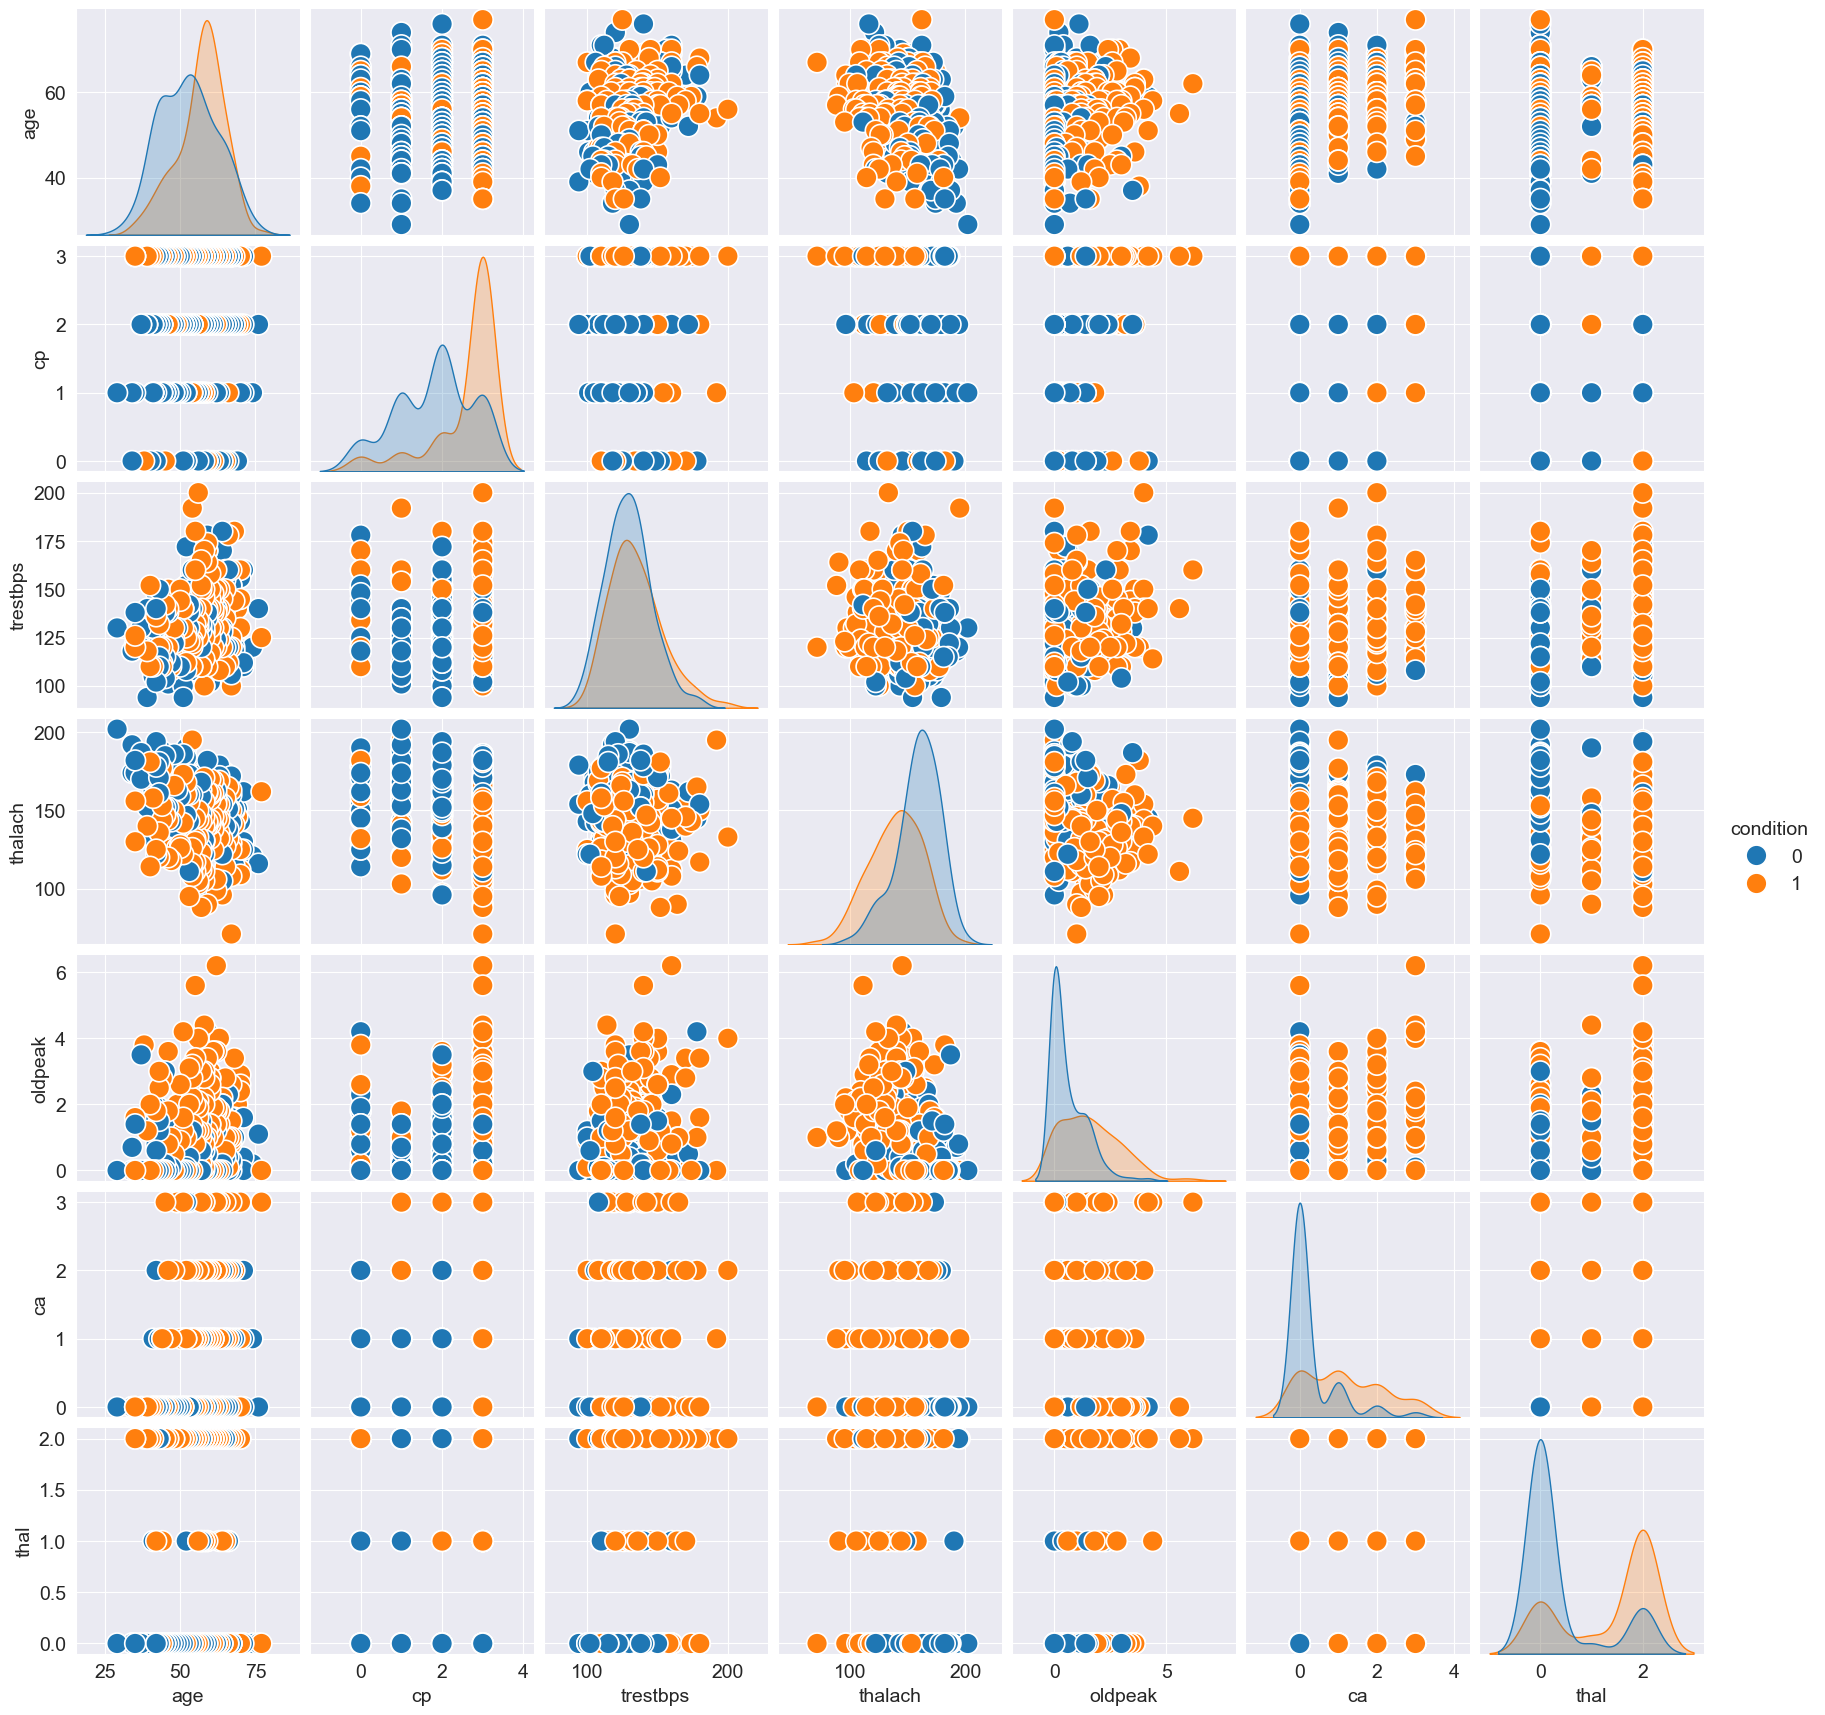

In [8]:
features =['age', 'cp', 'trestbps', 'thalach', 'oldpeak', 'ca', 'thal', 'condition'] #про именно эти параметры узнал чуть чуть дальше когда убрал метрики со слишком маленькими весами
sns.pairplot(df[features], hue="condition")
plt.show()

чтобы точно определить порог, посмотрим на увеличенные графики распределений

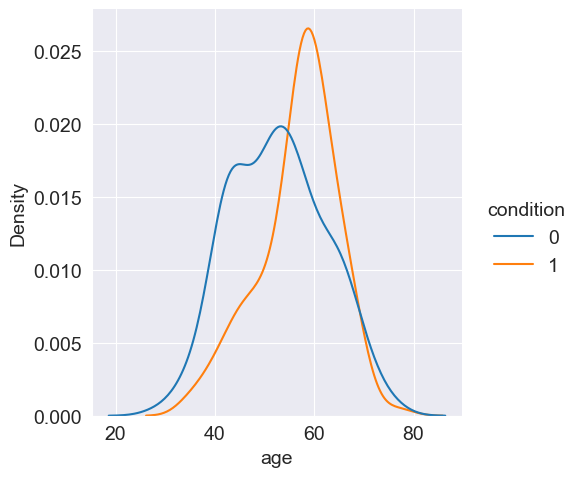

In [9]:
sns.displot(df, x="age", hue="condition", kind="kde", height=5)
plt.show()

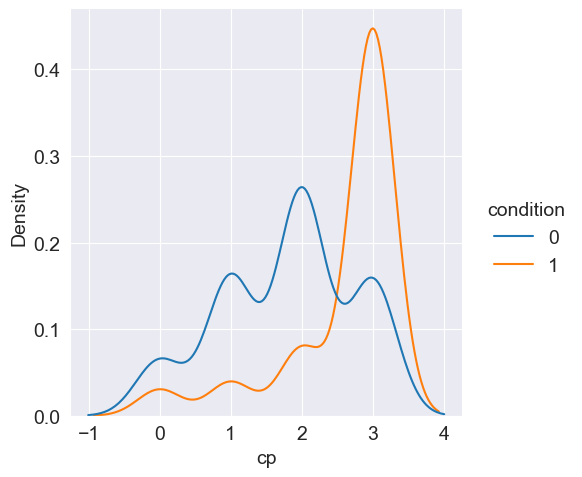

In [10]:
sns.displot(df, x="cp", hue="condition", kind="kde", height=5)
plt.show()

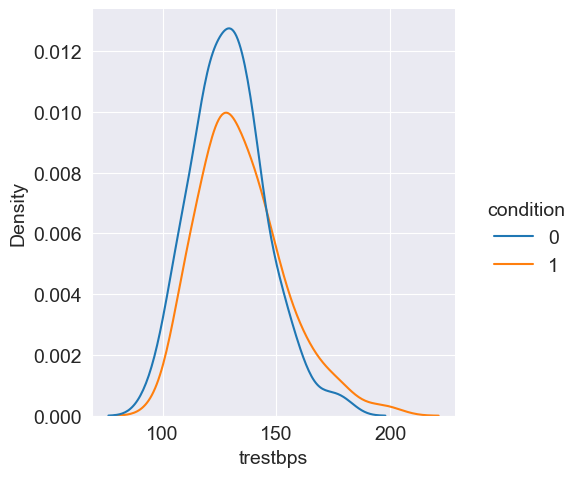

In [11]:
sns.displot(df, x="trestbps", hue="condition", kind="kde", height=5)
plt.show()

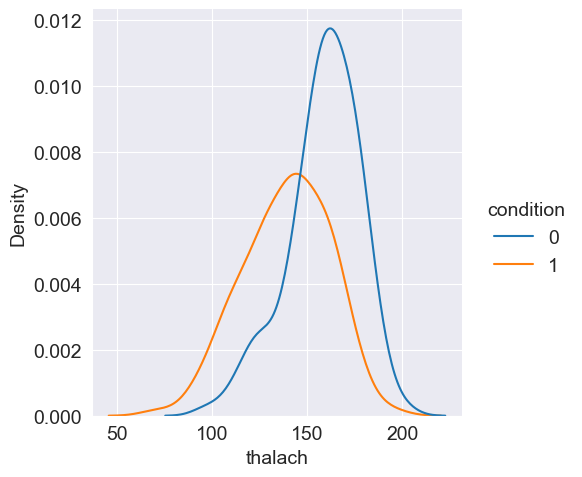

In [12]:
sns.displot(df, x="thalach", hue="condition", kind="kde", height=5)
plt.show()

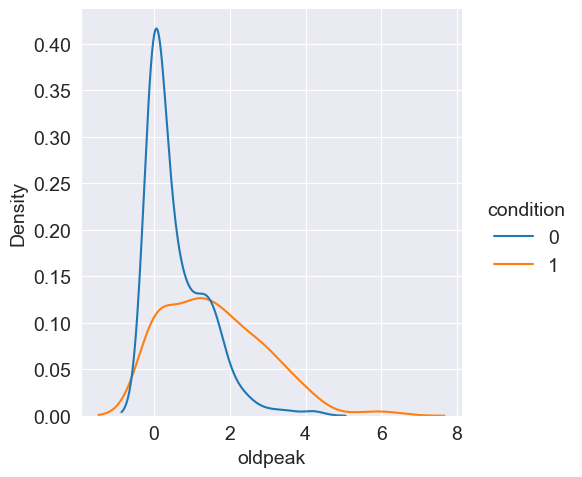

In [13]:
sns.displot(df, x="oldpeak", hue="condition", kind="kde", height=5)
plt.show()

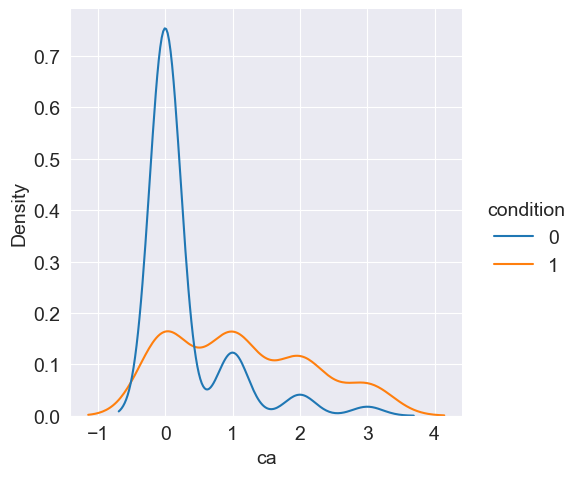

In [14]:
sns.displot(df, x="ca", hue="condition", kind="kde", height=5)
plt.show()

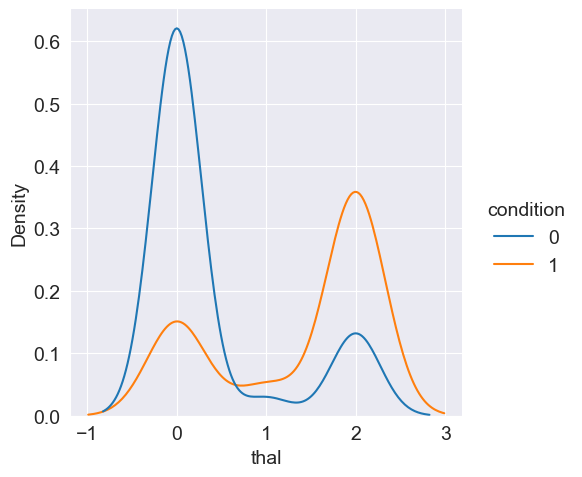

In [15]:
sns.displot(df, x="thal", hue="condition", kind="kde", height=5)
plt.show()

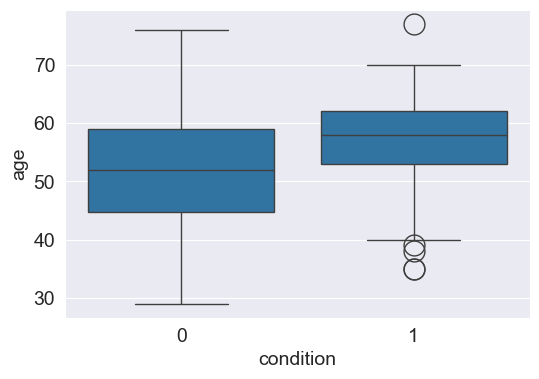

In [16]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="condition", y="age")
plt.show()

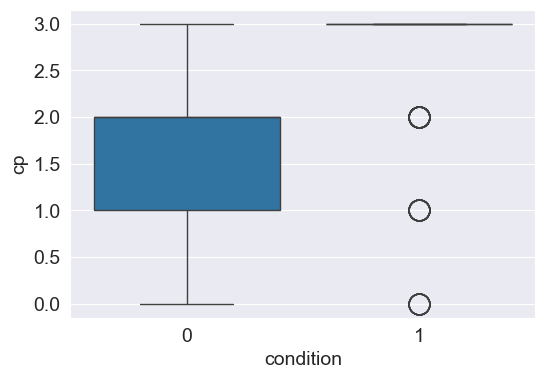

In [17]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="condition", y="cp")
plt.show()

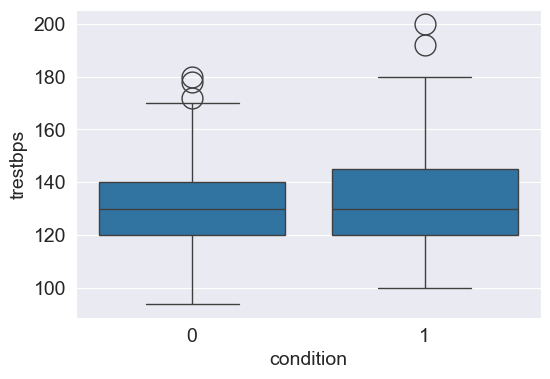

In [18]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="condition", y="trestbps")
plt.show()

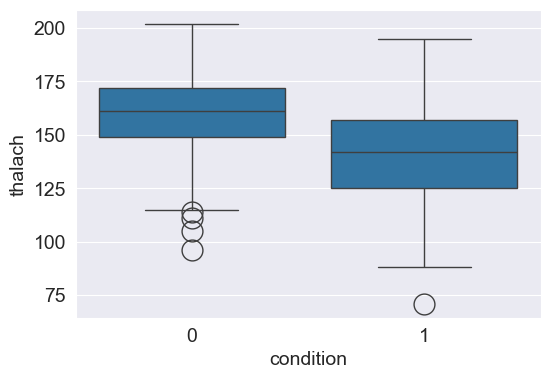

In [19]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="condition", y="thalach")
plt.show()

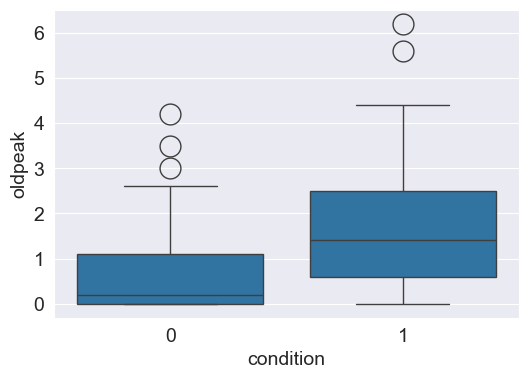

In [20]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="condition", y="oldpeak")
plt.show()

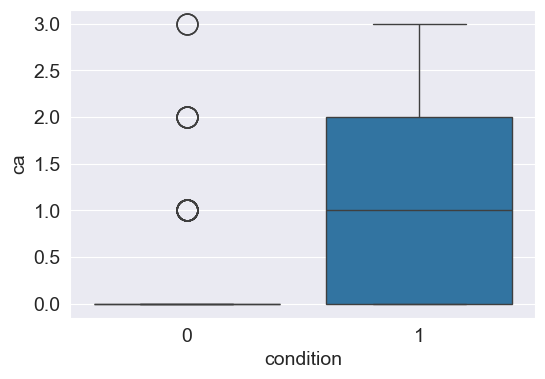

In [21]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="condition", y="ca")
plt.show()

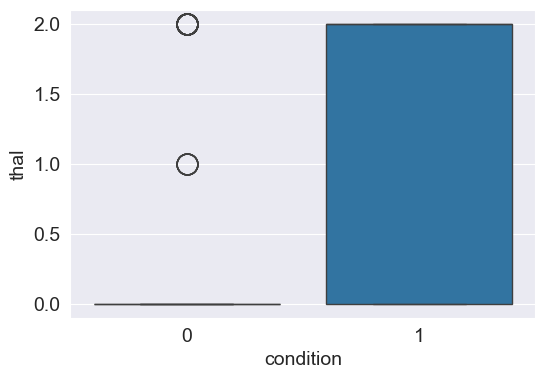

In [22]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="condition", y="thal")
plt.show()

In [23]:
X = df.drop(columns=["condition"]) #убираем целевой столбец из датасета
y = df["condition"]

#воспользуемся готовой функцией sklearn, чтобы изначально разделить наши данные:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((207, 13), (90, 13), (207,), (90,))

In [24]:
#Делаем лассо
lasso = Lasso(alpha=0.1, random_state=RANDOM_SEED)
lasso.fit(X_train, y_train)
feature_importances = pd.Series(lasso.coef_, index=X_train.columns)

# оставляем признаки которые больше 0,001 (сделал 0,001 т.к. когда кодил то переиодически при меньшем значении вылезали ошибки)
important_features = feature_importances[abs(feature_importances) >= 0.001].index.tolist()
print("important_features:", important_features)

important_features: ['trestbps', 'thalach', 'oldpeak', 'ca', 'thal']


In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
#Создаем baseline модель и далее получаем метрики на ней
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [27]:
# предсказание на тестовой выборке
y_pred = logreg.predict(X_test)
y_probs = logreg.predict_proba(X_test)

classification_report(y_test, y_pred)


'              precision    recall  f1-score   support\n\n           0       0.82      0.77      0.80        48\n           1       0.76      0.81      0.78        42\n\n    accuracy                           0.79        90\n   macro avg       0.79      0.79      0.79        90\nweighted avg       0.79      0.79      0.79        90\n'

In [28]:
#посчитаем AUC
def pr_auc(y_true, y_probs):
    precision, recall, thresholds= precision_recall_curve (y_true, y_probs[:, 1])
    return auc(recall, precision)

logreg_pr_auc = pr_auc(y_test, y_probs)
print(f"PR AUC: {logreg_pr_auc:.4f}")

PR AUC: 0.8639


Text(0.5, 1.0, 'ROC Curve')

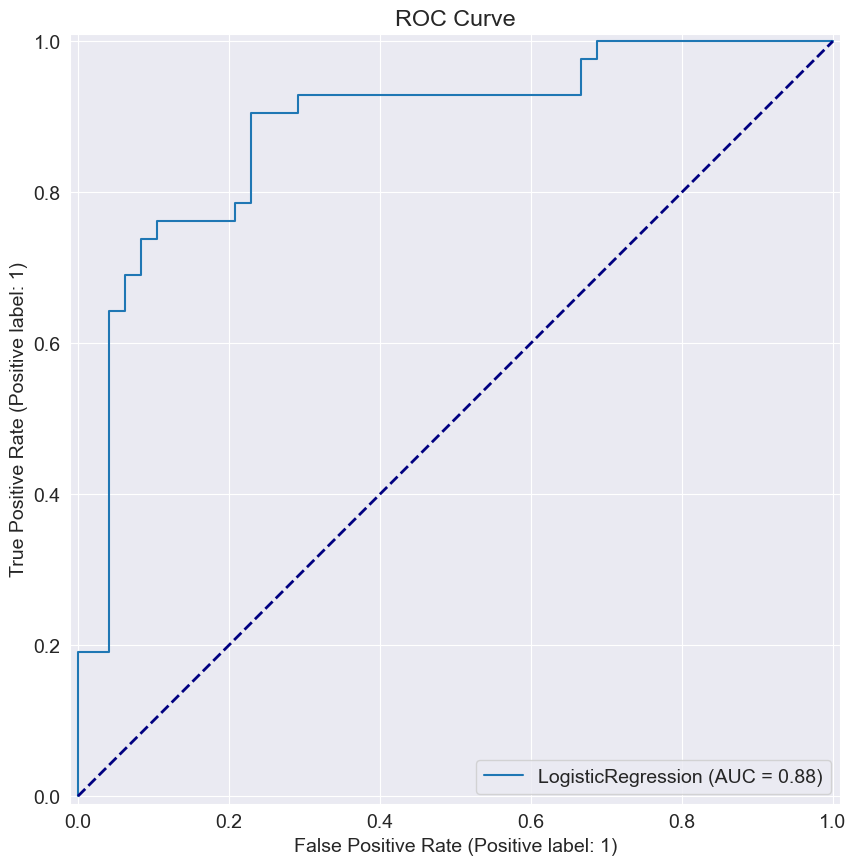

In [29]:
#ROC кривая
disp = RocCurveDisplay.from_estimator(logreg, X_test, y_test)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("ROC Curve")

In [30]:
#попробуем минимизировать пропуски больных
recall = recall_score(y_test, y_pred)  #чекаем сколько больных правильно опознано
print(f"Recall:{recall:.4f}")

Recall:0.8095


In [31]:
#зададим пороги и посмотрим при каком результаты наилучшие
thresholds= np.arange(0.1, 0.9, 0.1)
best_recall= 0
best_threshold= 0.5
for threshold in thresholds:
    y_pred_custom= (y_probs [:, 1] >= threshold).astype(int)
    current_recall= recall_score(y_test, y_pred_custom)
    if current_recall > best_recall:
        best_recall= current_recall
        best_threshold= threshold

print(f"Лучший порог: {best_threshold:.2f}, Recall:{best_recall:.4f}")

Лучший порог: 0.10, Recall:0.9286


как видно удалось поднять процент опознанных больных до 92% с 80%

<p align="center"><img src="https://sun9-38.userapi.com/impg/NtB_HJLrLwUsjdAAneOFlTTbYnJgK3yrM4niFA/ghbCtdq1F-4.jpg?size=445x370&quality=96&sign=c065279560459297436b36bc3df6058f&type=album" width=400/></p>